In [9]:
import matplotlib.pyplot as plt
import numpy as np

In [18]:
### PARAMETERS
L = 1.4     # meters
w0 = 0.078  #%
p0 = 550    # kg m^-3
phi_e = .485  # 48.5 
SS0 = .161   #16.1
d = 1*1e-3      # m, diatmeter of snow crystal (# does this need to be meters??)
A = .0625  # m area of tube
n = 3     # exponent
rho_i = 917   # density of ice, kg/ m^3
rho_w = 1e3   # density of water, kg/ m^3
g = -9.81       # gravity acc, m/ s^2
mu_w = 1.79e-2 # viscosity of water, kg / m*s

In [19]:
## calculate alpha
alpha = rho_w *g / mu_w

In [36]:
#Shimizu 1970
k1 = 0.077*(d**2)*np.exp(-7.8*(1-phi0)*rho_i / rho_w)

In [37]:
# Kozeny - Carmen
k0 = d**2 / 180
k2 = k0*((phi_e**3)/(1-phi_e)**2)

In [38]:
# Calonne (Moure et. al. paper)
k3 = 3*((d/2)**2)*np.exp(-0.013*rho_i*(1-phi_e))

In [32]:
a = -L*phi_e / (n*alpha*k3*(SS0**(n-1)))

In [50]:
## for t = 14e4
t = np.arange(0.000, 14e5, 1e3)

In [51]:
### calculate velocity given permeability relationship:
def calc_V(k, t):
    a = -L*phi_e / (n*alpha*k*(SS0**(n-1)))
    V = (a**(1/(1-n))) -(t**(1/(1-n)))   
    return V

In [52]:
V1 = calc_V(k1, t)
V2 = calc_V(k2, t)
V3 = calc_V(k3, t)

C:\Users\annav\AppData\Local\Temp\ipykernel_1808\160390622.py:4: RuntimeWarning: divide by zero encountered in power
  V = (a**(1/(1-n))) -(t**(1/(1-n)))


Text(0.5, 1.0, 'Comparison of Permeability Laws')

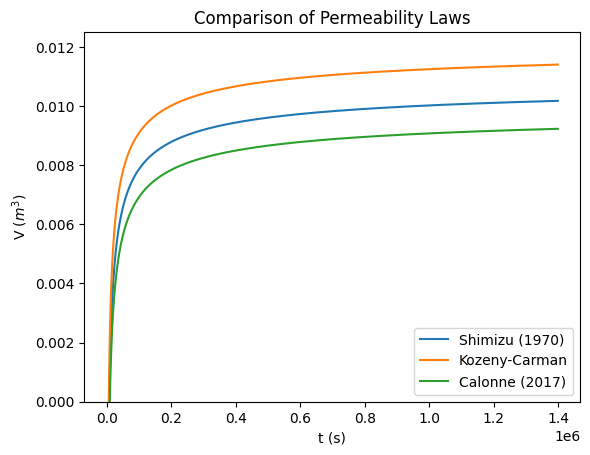

In [58]:
plt.plot(t, V1, label = "Shimizu (1970)")
plt.plot(t, V2, label = 'Kozeny-Carman')
plt.plot(t, V3, label = "Calonne (2017)")
plt.ylim(0, .0125)
#plt.xlim(0, 14e4)
plt.xlabel("t (s)")
plt.ylabel('V ($m^3$)')
plt.legend()
plt.title("Comparison of Permeability Laws")